# Разработка A/B-тестирования и анализ результатов

Компании разрабатывает развлекательное приложение с функцией «бесконечной» ленты (как, например, в приложениях с короткими видео). В приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. 
## Задача
Рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-11 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе работаем с историческими данными приложения:

- Импортируем библиотеку pandas.

- Считаем и сохраняем в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выводим на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd

sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [2]:
user_session_counts = sessions_history.groupby('user_id')['session_id'].nunique()
max_sessions_user = user_session_counts.idxmax()
sessions_history[sessions_history['user_id'] == max_sessions_user]

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

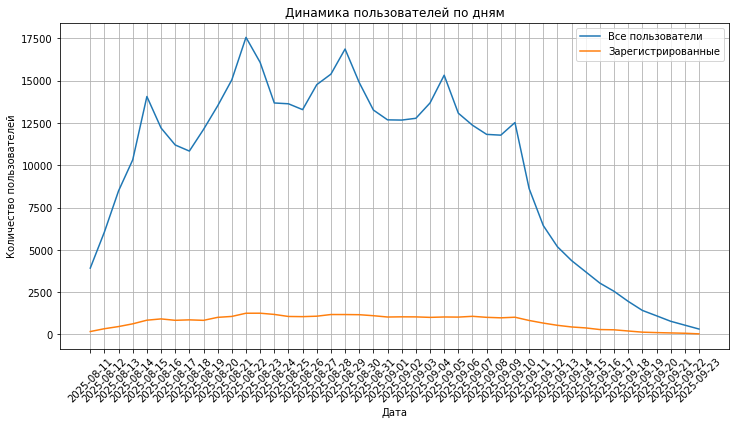

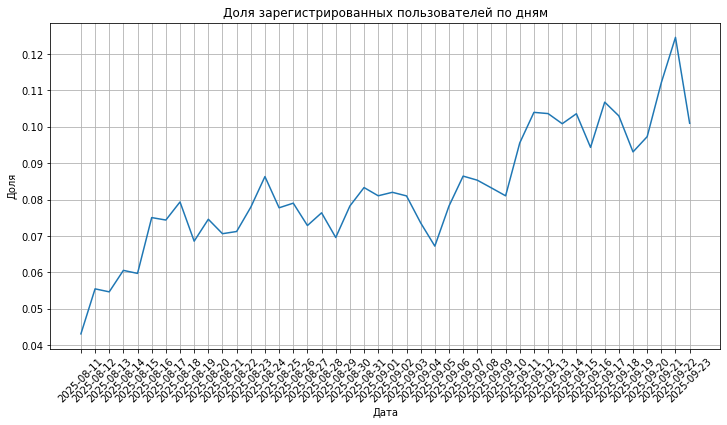

In [3]:
daily_users = sessions_history.groupby('session_date').agg(
    total_users=('user_id', 'nunique'),
    registered_users=('registration_flag', 'sum')
).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_users['session_date'], daily_users['total_users'], label='Все пользователи')
plt.plot(daily_users['session_date'], daily_users['registered_users'], label='Зарегистрированные')
plt.title('Динамика пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
daily_users['registration_ratio'] = daily_users['registered_users'] / daily_users['total_users']
plt.plot(daily_users['session_date'], daily_users['registration_ratio'])
plt.title('Доля зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29 160 сессиях, две страницы — в 105 536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

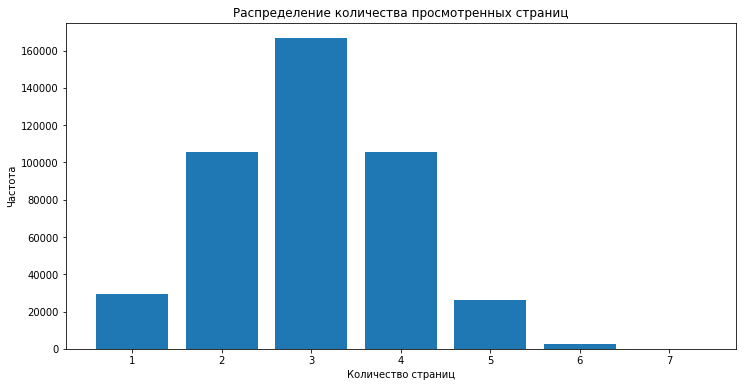

In [4]:
page_counts = sessions_history['page_counter'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(page_counts.index, page_counts.values)
plt.title('Распределение количества просмотренных страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Частота')
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

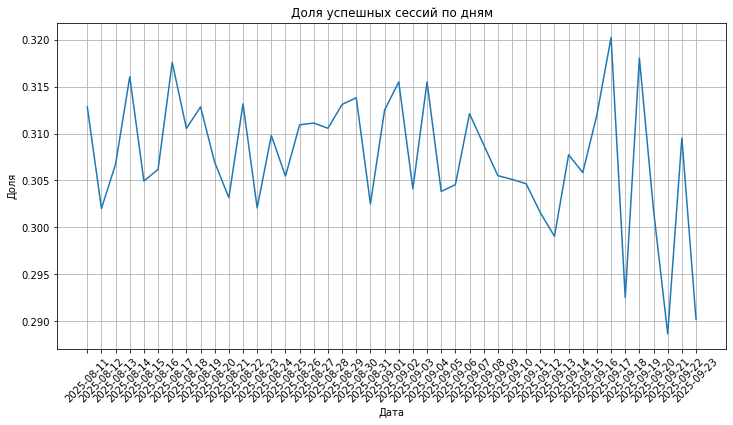

In [5]:
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)
daily_good_sessions = sessions_history.groupby('session_date')['good_session'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_good_sessions.index, daily_good_sessions.values)
plt.title('Доля успешных сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1 Формулировка нулевой и альтернативной гипотез

Перед тем как проводить А/B-тест, необходимо сформулировать нулевую и альтернативную гипотезы. Напомним изначальное условие: команда разработчиков рекомендательных систем создала новый алгоритм, который, по их мнению, будет показывать более интересный контент для каждого пользователя.

О какой метрике идёт речь? Как она будет учтена в формулировке гипотез?

Сформулируйте нулевую и альтернативную гипотезы:

Нулевая гипотеза (H0): Новый алгоритм рекомендаций не влияет на долю успешных сессий.
Альтернативная гипотеза (H1): Новый алгоритм рекомендаций увеличивает долю успешных сессий.




#### 2.2. Расчёт размера выборки
В рамках курса вы уже рассчитывали размеры выборки и  использовали для этого онлайн-калькулятор. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки используйте метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [6]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p = 0.3 # Базовый уровень доли
mde = 0.03 * p  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


#### 2.3. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [7]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = sessions_history['user_id'].nunique() / sessions_history['session_date'].nunique()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(2 * sample_size / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 3046.340909090909 пользователей в день составит 27 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой будет видно возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [8]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')
group_counts = sessions_test_part.groupby('test_group')['user_id'].nunique()
diff_percentage = 100 * abs(group_counts['A'] - group_counts['B']) / group_counts['A']
print(f"Разница в количестве пользователей: {diff_percentage:.2f}%")

Разница в количестве пользователей: 0.74%


#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [9]:
users_a = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'])
users_b = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'])
common_users = users_a & users_b
print(f"Общие пользователи: {len(common_users)}")

Общие пользователи: 0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


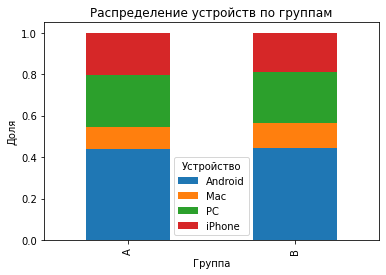

device,Android,Mac,PC,iPhone
test_group,,,,
A,0.436751,0.106525,0.252330,0.204394
B,0.444103,0.121007,0.246929,0.187961


In [10]:
device_distribution = pd.crosstab(sessions_test_part['test_group'], sessions_test_part['device'], normalize='index')
device_distribution.plot(kind='bar', stacked=True)
plt.title('Распределение устройств по группам')
plt.xlabel('Группа')
plt.ylabel('Доля')
plt.legend(title='Устройство')
plt.show()

display(device_distribution)

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


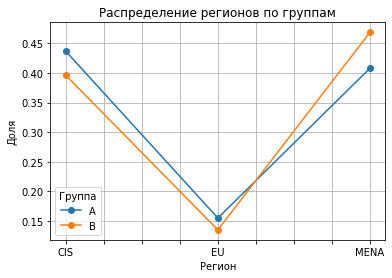

region,CIS,EU,MENA
test_group,,,
A,0.436751,0.155126,0.408123
B,0.396192,0.135135,0.468673


In [11]:
region_distribution = pd.crosstab(sessions_test_part['test_group'], sessions_test_part['region'], normalize='index')
region_distribution.T.plot(kind='line', marker='o')
plt.title('Распределение регионов по группам')
plt.xlabel('Регион')
plt.ylabel('Доля')
plt.legend(title='Группа')
plt.grid(True)
plt.show()

display(region_distribution)

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Было ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение: корректно ли проходит A/B-тест, или наблюдаются какие-либо нарушения.

На основе проведённого анализа первых трёх дней A/B-теста можно сделать следующие выводы:

- Различие в количестве пользователей:

Обнаружена незначительная разница в количестве пользователей между группами A и B (0.74%).

Такое расхождение (менее 1%) является допустимым и не свидетельствует о систематической ошибке в распределении.

- Независимость выборок:

Пересечение пользователей между группами A и B полностью отсутствует (0 общих пользователей).

Это подтверждает корректность технической реализации сплит-системы и соблюдение принципа независимости выборок.

- Распределение по категориальным переменным:

Устройства: Распределение по типам устройств в обеих группах практически идентично. Небольшие различия в долях устройств (например, Android: 43.7% vs 44.4%; iPhone: 20.4% vs 18.8%) находятся в пределах статистической погрешности и не указывают на систематическое смещение.

Регионы: Наблюдается некоторое различие в региональном распределении:

В группе B немного выше доля пользователей из MENA (46.9% vs 40.8% в группе A)

Соответственно, в групбе B немного ниже доли пользователей из CIS (39.6% vs 43.7%) и EU (13.5% vs 15.5%)

Эти различия не являются критичными, но требуют внимания при анализе результатов теста

- Общее заключение:

A/B-тест проводится в целом корректно, без существенных нарушений

Техническая реализация сплит-системы работает правильно

Небольшие различия в региональном распределении могут быть обусловлены случайными факторами, но рекомендуется:

Продолжить мониторинг распределения пользователей по регионам

При анализе результатов учесть возможное влияние региональных особенностей на ключевые метрики

Тест может быть продолжен с учетом этих наблюдений

Тест соответствует основным требованиям корректного A/B-тестирования, и полученные данные могут быть использованы для дальнейшего анализа эффективности нового алгоритма рекомендаций.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [12]:
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)
display(sessions_test)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100000,CF77C27B238C1BE3,0F7BC9B33685377C,2025-10-22,2025-10-22 19:01:50,2025-10-20,3,0,3,MENA,Android,A,0
100001,D7ED66C581409AC2,26C4475005E70F47,2025-10-17,2025-10-17 22:12:38,2025-10-17,1,0,5,CIS,PC,A,1
100002,E7EA2D51238020C6,9B9CDE6A612CBD73,2025-10-24,2025-10-24 14:54:07,2025-10-14,2,0,3,MENA,PC,B,0
100003,8A6FEFD7F34C5DA1,37291EC27106EF9D,2025-10-18,2025-10-18 00:05:10,2025-10-14,3,0,4,EU,Android,B,1


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимыми. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [13]:
from scipy.stats import ttest_ind

daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().unstack()
t_stat, p_value = ttest_ind(daily_sessions['A'], daily_sessions['B'])
print(f"p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Нет статистически значимых различий в количестве сессий между группами A и B.")
    print("Распределение сессий по дням в обеих группах происходит равномерно.")
else:
    print("Обнаружены статистически значимые различия в количестве сессий между группами.")
    print("Это может указывать на проблему в дизайне эксперимента или неравномерное распределение пользователей.")

p-value: 0.9382
Нет статистически значимых различий в количестве сессий между группами A и B.
Распределение сессий по дням в обеих группах происходит равномерно.


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница в долях: 0.0106


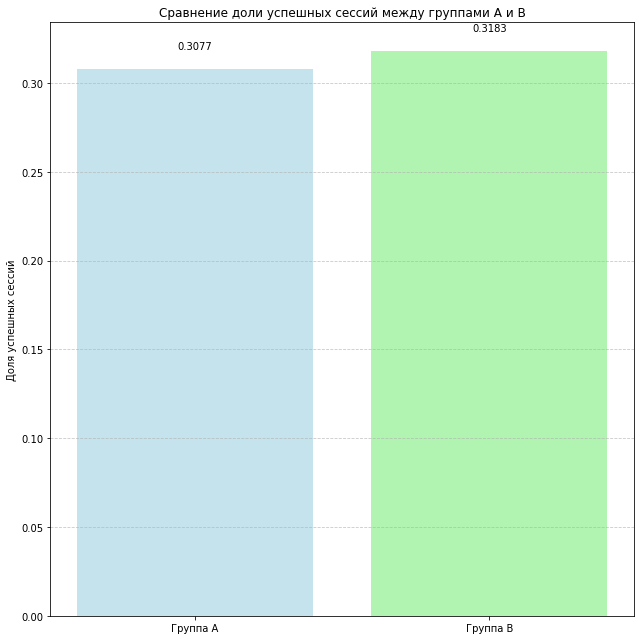

In [14]:
good_sessions_rate = sessions_test.groupby('test_group')['good_session'].mean()
diff = good_sessions_rate['B'] - good_sessions_rate['A']

print(f"Доля успешных сессий в группе A: {good_sessions_rate['A']:.4f}")
print(f"Доля успешных сессий в группе B: {good_sessions_rate['B']:.4f}")
print(f"Разница в долях: {diff:.4f}")

# Визуализация результатов
plt.figure(figsize=(9, 9))
groups = ['Группа A', 'Группа B']
rates = [good_sessions_rate['A'], good_sessions_rate['B']]
colors = ['lightblue', 'lightgreen']

bars = plt.bar(groups, rates, color=colors, alpha=0.7)
plt.title('Сравнение доли успешных сессий между группами A и B')
plt.ylabel('Доля успешных сессий')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем значения на столбцы
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{rate:.4f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [15]:
from statsmodels.stats.proportion import proportions_ztest

successes = sessions_test.groupby('test_group')['good_session'].sum()
trials = sessions_test.groupby('test_group')['good_session'].count()
z_stat, p_value = proportions_ztest(successes, trials)

print(f"p-value: {p_value:.4f}")

if p_value <= 0.05:
    print("Статистически значимое различие обнаружено.")
    print("Отклоняем нулевую гипотезу: новый алгоритм рекомендаций повлиял на долю успешных сессий.")
else:
    print("Статистически значимое различие не обнаружено.")
    print("Не отклоняем нулевую гипотезу: нет оснований считать, что новый алгоритм рекомендаций повлиял на долю успешных сессий.")

print(f"Уровень значимости: 0.05")

p-value: 0.0003
Статистически значимое различие обнаружено.
Отклоняем нулевую гипотезу: новый алгоритм рекомендаций повлиял на долю успешных сессий.
Уровень значимости: 0.05


#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять нововведение в приложение.

- Характеристики эксперимента:

Тест проводился с 2025-10-14 по 2025-11-02 (20 дней)

Необходимый размер выборки для каждой группы эксперимента: 41040 (равномерное распределение между группами)

- Результаты воздействия:
Новый алгоритм рекомендаций показал статистически значимое улучшение ключевой метрики:

Доля успешных сессий выросла с 30.77% до 31.83%

Абсолютный прирост составил +1.06%

- Статистическая значимость:

p-value = 0.0003 (значительно ниже уровня значимости 0.05)

Эффект является статистически значимым

- Рекомендация:
Нововведение рекомендуется к внедрению. Новый алгоритм рекомендаций доказал свою эффективность в увеличении вовлеченности пользователей через рост доли успешных сессий.